# Imports

In [53]:
import os
import sys
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx

# Loading the data

In [54]:
nvars = ['1V', '2V']
cases = ['ind', 'com']
operations = ['OR', 'AND', 'XOR']

names = []

In [55]:
FILES_PATH = 'results/simulation'
FILES = os.listdir('results/simulation')

In [56]:
FILES_NAMES = dict()

for nvar in nvars:
    for case in cases:
        file_title = 'Simulation' + nvar + '_' + case
        if nvar == '2V':
            for operation in operations:
                file_title = 'Simulation' + nvar + '_' + operation + '_' + case
                FILES_NAMES[file_title] = [file_names for file_names in FILES if file_names.startswith(file_title)]
        else:
            FILES_NAMES[file_title] = [file_names for file_names in FILES if file_names.startswith(file_title)]

In [57]:
DATA = dict()

for dataset in FILES_NAMES.keys():
    DATA[dataset] = dict()
    for file_name in FILES_NAMES[dataset]:
        with open(FILES_PATH + '/' + file_name, 'rb') as f:
            table = pickle.load(f)
            try:
                for metric in table.keys():
                    for model in table[metric].keys():
                        model_name = model.replace('adversarial', 'advs')
                        model_name = model_name.replace('metafair', 'meta')
                        DATA[dataset][metric][model_name].append(table[metric][model])
            except:
                for key in table.keys():
                    DATA[dataset][metric] = dict()
                    for model in table[metric].keys():
                        model_name = model.replace('adversarial', 'advs')
                        model_name = model_name.replace('metafair', 'meta')
                        DATA[dataset][metric][model_name] = [table[metric][model]]


In [58]:
list(table['acc'].keys())[12].replace('metafair', 'meta')

'meta_sr'

# Figures for MPs

In [59]:
name1 = 'RW_logreg'
name2 = 'pir'
name3 = 'RW_pir'

COUPLE_SEP = dict()

COUPLE_SEP[name1] = DATA['Simulation1V_ind']['separation'][name1]
COUPLE_SEP[name2] = DATA['Simulation1V_ind']['separation'][name2]
COUPLE_SEP[name3] = DATA['Simulation1V_com']['separation'][name3]

In [60]:
COUPLE_ACC = dict()

COUPLE_ACC[name1] = DATA['Simulation1V_ind']['acc'][name1]
COUPLE_ACC[name2] = DATA['Simulation1V_ind']['acc'][name2]
COUPLE_ACC[name3] = DATA['Simulation1V_com']['acc'][name3]

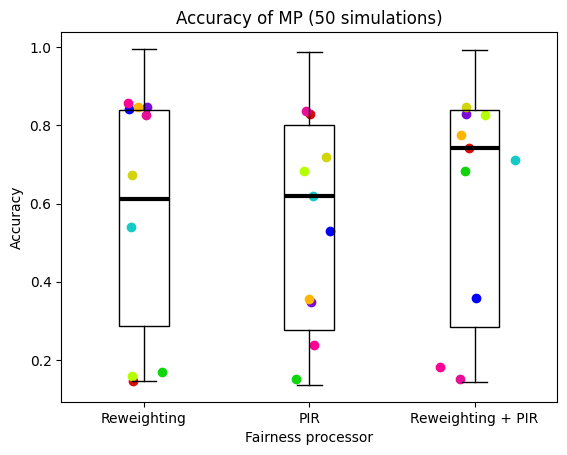

In [61]:
fig, ax = plt.subplots()

bp = ax.boxplot(COUPLE_ACC.values(), patch_artist=True)

ax.set_xticklabels(['Reweighting', 'PIR', 'Reweighting + PIR'])
ax.set_xlabel('Fairness processor')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of MP (50 simulations)')

off = 0
limit = 10

colors = [
    [1, 1, 1, 0],
    [1, 1, 1, 0], 
    [1, 1, 1, 0]
         ]

colors_dots  = [
    [0/255, 0/255, 255/255], # Azul
    [19/255, 203/255, 198/255], # Cyan
    [122/255, 12/255, 213/255], # Morado
    [255/255, 0/255, 151/255], # Rosa
    [213/255, 12/255, 12/255], # Rojo
    [15/255, 213/255, 12/255], # Verde
    [209/255, 213/255, 12/255], # Amarillo
    [182/255, 255/255, 0/255], # Verde vómito
    [230/255, 15/255, 152/255], # Rosa otra vez
    [255/255, 182/255, 0/255] # Naranja otra vez
]

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color = 'black', linewidth = 3)

j = 0
t = np.linspace(0,1,limit)
for name in COUPLE_ACC.keys():
    j += 1
    y = COUPLE_ACC[name][off:off+limit]

    x = np.random.normal(j, 0.08, size=len(y))
    color = np.array(colors_dots[j-1])
    for i in range(len(y)):
        ax.scatter(x[i], y[i], color = colors_dots[i])

plt.show()
fig.savefig('results/Figures/boxplots/AccMP.png')

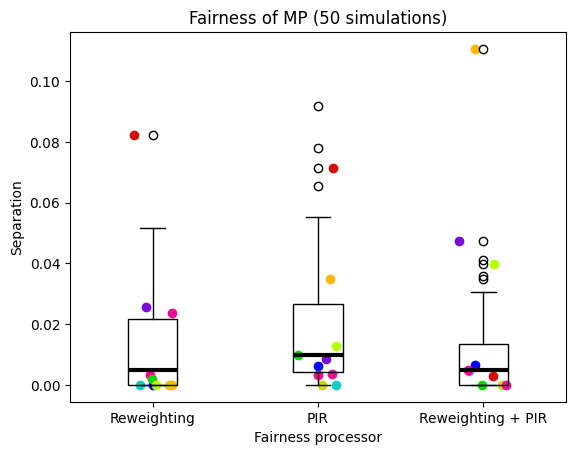

In [62]:
fig, ax = plt.subplots()

bp = ax.boxplot(COUPLE_SEP.values(), patch_artist = True)

ax.set_xticklabels(['Reweighting', 'PIR', 'Reweighting + PIR'])
ax.set_xlabel('Fairness processor')
ax.set_ylabel('Separation')
ax.set_title('Fairness of MP (50 simulations)')

colors_dots  = [
    [0/255, 0/255, 255/255], # Azul
    [19/255, 203/255, 198/255], # Cyan
    [122/255, 12/255, 213/255], # Morado
    [255/255, 0/255, 151/255], # Rosa
    [213/255, 12/255, 12/255], # Rojo
    [15/255, 213/255, 12/255], # Verde
    [209/255, 213/255, 12/255], # Amarillo
    [182/255, 255/255, 0/255], # Verde vómito
    [230/255, 15/255, 152/255], # Rosa otra vez
    [255/255, 182/255, 0/255] # Naranja otra vez
]

colors = [
    [1, 1, 1, 0],
    [1, 1, 1, 0], 
    [1, 1, 1, 0]
         ]
    
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color = 'black', linewidth = 3)

j = 0
t = np.linspace(0,1,limit)
for name in COUPLE_SEP.keys():
    j += 1
    y = COUPLE_SEP[name][off:off+limit]
    x = np.random.normal(j, 0.08, size=len(y))
    for i in range(len(y)):
        ax.scatter(x[i], y[i], color = colors_dots[i])

plt.show()
fig.savefig('results/Figures/boxplots/FairMP.png')

# Figures of LP

In [63]:
model = 'logreg_RejOpt_spd'

name1 = '1V_ind'
name2 = '2V_OR_ind'
name3 = '2V_AND_ind'
name4 = '2V_XOR_ind'

LP_SEP = dict()

LP_SEP[name1] = DATA['Simulation1V_ind']['separation'][model]
LP_SEP[name2] = DATA['Simulation2V_OR_ind']['separation'][model]
LP_SEP[name3] = DATA['Simulation2V_AND_ind']['separation'][model]
LP_SEP[name4] = DATA['Simulation2V_XOR_ind']['separation'][model]

In [64]:
LP_ACC = dict()

LP_ACC[name1] = DATA['Simulation1V_ind']['acc'][model]
LP_ACC[name2] = DATA['Simulation2V_OR_ind']['acc'][model]
LP_ACC[name3] = DATA['Simulation2V_AND_ind']['acc'][model]
LP_ACC[name4] = DATA['Simulation2V_XOR_ind']['acc'][model]

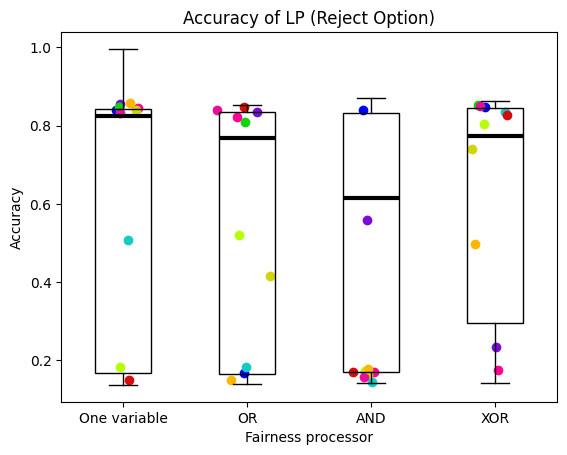

In [65]:
fig, ax = plt.subplots()

bp = ax.boxplot(LP_ACC.values(), patch_artist = True)

ax.set_xticklabels(['One variable', 'OR', 'AND', 'XOR'])
ax.set_xlabel('Fairness processor')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of LP (Reject Option)')

off = 0
limit = 10

colors_dots  = [
    [0/255, 0/255, 255/255], # Azul
    [19/255, 203/255, 198/255], # Cyan
    [122/255, 12/255, 213/255], # Morado
    [255/255, 0/255, 151/255], # Rosa
    [213/255, 12/255, 12/255], # Rojo
    [15/255, 213/255, 12/255], # Verde
    [209/255, 213/255, 12/255], # Amarillo
    [182/255, 255/255, 0/255], # Verde vómito
    [230/255, 15/255, 152/255], # Rosa otra vez
    [255/255, 182/255, 0/255] # Naranja otra vez
]


colors = [
    [1, 0, 0, 0],
    [1, 0, 0, 0], 
    [1, 0, 0, 0],
    [1, 0, 0, 0]
         ]

j = 0
t = np.linspace(0,1,limit)
for name in LP_ACC.keys():
    j += 1
    y = LP_ACC[name][off:off+limit]
    x = np.random.normal(j, 0.1, size=len(y))
    for i in range(len(y)):
        ax.scatter(x[i], y[i], color = colors_dots[i])

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color = 'black', linewidth = 3)

plt.show()
fig.savefig('results/Figures/boxplots/AccLP.png')

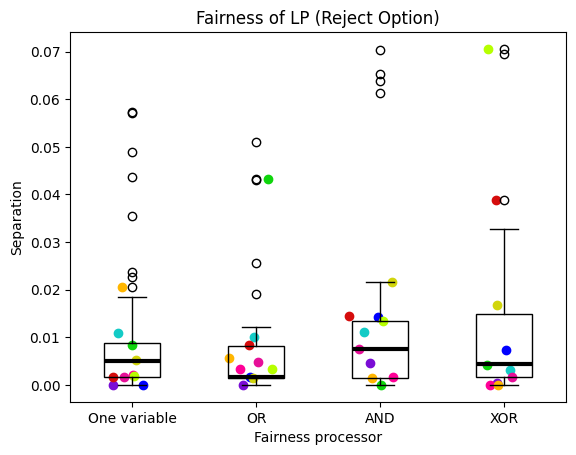

In [66]:
fig, ax = plt.subplots()

bp = ax.boxplot(LP_SEP.values(), patch_artist = True)

ax.set_xticklabels(['One variable', 'OR', 'AND', 'XOR'])
ax.set_xlabel('Fairness processor')
ax.set_ylabel('Separation')
ax.set_title('Fairness of LP (Reject Option)')

colors = [
    [1, 0, 0, 0],
    [1, 0, 0, 0], 
    [1, 0, 0, 0],
    [1, 0, 0, 0]
         ]

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

j = 0
t = np.linspace(0,1,limit)
for name in LP_SEP.keys():
    j += 1
    y = LP_SEP[name][off:off+limit]
    x = np.random.normal(j, 0.1, size=len(y))
    for i in range(len(y)):
        ax.scatter(x[i], y[i], color = colors_dots[i])

for median in bp['medians']:
    median.set(color = 'black', linewidth = 3)

plt.show()
fig.savefig('results/Figures/boxplots/FairLP.png')

# Median results

In [75]:
# Name of the processors
preproc = ['RW', 'DI']
inproc = ['meta', 'pir', 'advs']
postproc = ['Platt', 'eqOdds', 'RejOpt']
proc = preproc + inproc + postproc

# Names that should be used in case one method appears individually (i.e. we put logistic regreesion for pre processors)
default_labels = {
    'RW': 'RW_logreg',
    'DI': 'DI_logreg',
    'advs': 'advs',
    'meta': 'meta_sr',
    'pir': 'pir',
    'Platt': 'Platt',
    'eqOdds': 'eqOdds',
    'RejOpt': 'RejOpt_spd'
    }


def combination_matrix(resultsInd: pd.DataFrame, resultsCom: pd.DataFrame) -> dict[pd.DataFrame]:
    """
    Store results of individual and combined performance in the same data frame
    ======================================================================================================
    Inputs:
        resultsInd (pd.DataFrame): Data frame that stores the results of the individual methods.
        resultsCom (pd.DataFrame): Data frame that stores the results of the MP processors.

    Outputs:
        matrices (dict): dictionary whose entries are a data frame for each metric which stores the combined
            results for each one.
    """

    # Create the dictinoary
    matrices = dict()
    # Select metrics
    metrics = ['acc', 'bal_acc', 'independence', 'separation', 'sufficiency']
    # Initialize the reuslts of each metric as an empty data frame
    for metric in metrics:
        matrices[metric] = pd.DataFrame(np.nan, index=proc, columns=proc)

    # Iterate to generate the matric
    for index1 in proc:
        for index2 in proc:
            # Illegal combinations:
            # We use this iteration to store the results of individual methods.
            # We store the results of index1.
            if \
                (index1 in preproc and index2 in preproc) or \
                (index1 in inproc and index2 in inproc) or \
                (index1 in postproc and index2 in postproc):

                # Select the correct name
                if index1 in postproc:
                    nameUse = 'logreg_' + default_labels[index1]
                else:
                    nameUse = default_labels[index1]

                # Store individual results
                for metric in metrics:
                    matrices[metric].loc[index1, index2] = resultsInd.loc[nameUse, metric]

            # Allowed combinations
            else:
                
                # If the entry is empty:
                if np.isnan(matrices[metric].loc[index1, index2]):
                    # Use the correct name
                    if (index1 in preproc and index2 in inproc):
                        method_name = index1 + '_' + index2
                    else:
                        method_name = default_labels[index1] + '_' + default_labels[index2]                    
                    
                    # Store the combined performance in [index1, index2] and [index2, index1].
                    for metric in metrics:
                        matrices[metric].loc[index1, index2] = resultsCom.loc[method_name, metric]
                        matrices[metric].loc[index2, index1] = resultsCom.loc[method_name, metric]
                    
    return matrices


def plot_heat_combination_matrix(meanInd: pd.DataFrame, meanCom: pd.DataFrame, 
                                      stdInd: pd.DataFrame, stdCom: pd.DataFrame, 
                                      metric: str, invert_color: bool = True):
    """
    Heatmap plot that shows the performance of the combination of methods
    ======================================================================================================
    Inputs:
        resultsInd (pd.DataFrame): Data frame that stores the results of the individual methods.
        resultsCom (pd.DataFrame): Data frame that stores the results of the MP processors.
        metric (str): Name of the metric we are interested in visualizing.

    Outputs:
        fig, ax (plt.figure, plt.axes): plt objects that store the plot we produce.
    """
    
    matrix_vals = pd.DataFrame(np.nan, index=proc, columns=proc)
    matrix_annot = pd.DataFrame("", index=proc, columns=proc)
    
    baseline_mean = meanInd.loc['logreg', metric] if 'logreg' in meanInd.index else 0
    
    for index1 in proc:
        for index2 in proc:
            
            is_group_match = (
                (index1 in preproc and index2 in preproc) or
                (index1 in inproc and index2 in inproc) or
                (index1 in postproc and index2 in postproc)
            )

            if is_group_match:
                if index1 in postproc:
                    nameUse = 'logreg_' + default_labels[index1]
                else:
                    nameUse = default_labels[index1]
                
                try:
                    val_mean = meanInd.loc[nameUse, metric]
                    val_std = stdInd.loc[nameUse, metric]
                    
                    diff = val_mean - baseline_mean
                    matrix_vals.loc[index1, index2] = diff
                    matrix_annot.loc[index1, index2] = f"{diff:.2f}\n±{val_std:.2f}"
                except KeyError:
                    pass

            else:
                if np.isnan(matrix_vals.loc[index1, index2]):
                    if (index1 in preproc and index2 in inproc):
                        method_name = index1 + '_' + index2
                    else:
                        method_name = default_labels[index1] + '_' + default_labels[index2]
                    
                    try:
                        val_mean = meanCom.loc[method_name, metric]
                        val_std = stdCom.loc[method_name, metric]
                        
                        diff = val_mean - baseline_mean
                        
                        matrix_vals.loc[index1, index2] = diff
                        matrix_vals.loc[index2, index1] = diff
                        
                        label = f"{diff:.2f}\n±{val_std:.2f}"
                        matrix_annot.loc[index1, index2] = label
                        matrix_annot.loc[index2, index1] = label
                    except KeyError:
                        pass

    fig, ax = plt.subplots(figsize=(6, 6))

    mask = np.triu(np.ones_like(matrix_vals, dtype=bool), k=1)
    mask[0:2, 0:2] = True
    mask[2:5, 2:5] = True
    mask[5:, 5:] = True
    np.fill_diagonal(mask, False)

    max_val = matrix_vals.max().max()
    min_val = matrix_vals.min().min()
    
    if pd.isna(max_val) or pd.isna(min_val):
        v_lim = 0.05
    else:
        v_lim = max(abs(max_val), abs(min_val))
        if v_lim == 0: v_lim = 0.05
    cmap = "RdBu" if invert_color else "RdBu_r"
    norm = plt.Normalize(vmin=matrix_vals.min().min(), vmax=matrix_vals.max().max())

    sns.heatmap(
        matrix_vals,
        mask=mask,
        annot=matrix_annot.values,
        fmt="",
        linewidth=0.5,
        ax=ax,
        cmap=cmap,
        vmin=-v_lim, 
        vmax=v_lim,
        center=0,
        annot_kws={"size": 8}
    )

    ax.set_xlabel("Fairness processor")
    ax.set_ylabel("Fairness processor")
    
    return fig, ax

In [76]:
metrics = ['independence', 'separation', 'sufficiency', 'acc', 'bal_acc']
not_finished = []
medianResults = dict()
meanResults = dict()
stdResults = dict()

for key in DATA.keys():
    if key in not_finished:
        pass
    else:
        medianResults[key] = pd.DataFrame(np.nan, index = DATA[key]['acc'].keys(), columns = metrics)
        meanResults[key] = pd.DataFrame(np.nan, index = DATA[key]['acc'].keys(), columns = metrics)
        stdResults[key] = pd.DataFrame(np.nan, index = DATA[key]['acc'].keys(), columns = metrics)
        for metric in metrics:
            medianResults[key][metric] = pd.DataFrame(DATA[key][metric]).median()*100
            meanResults[key][metric] = pd.DataFrame(DATA[key][metric]).mean()*100
            stdResults[key][metric] = pd.DataFrame(DATA[key][metric]).std()*100

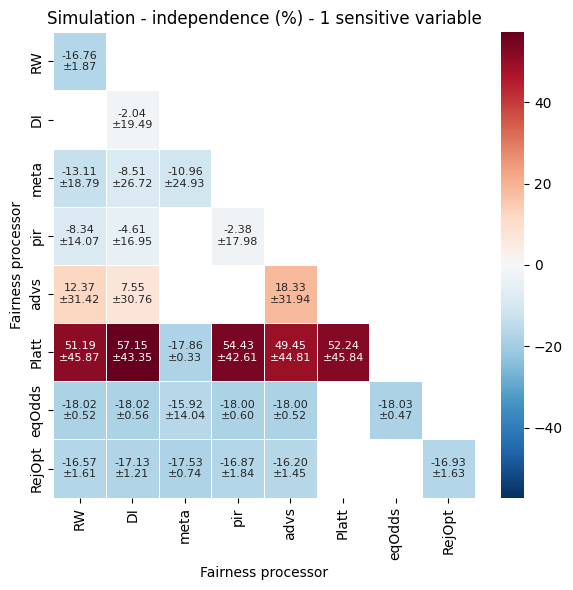

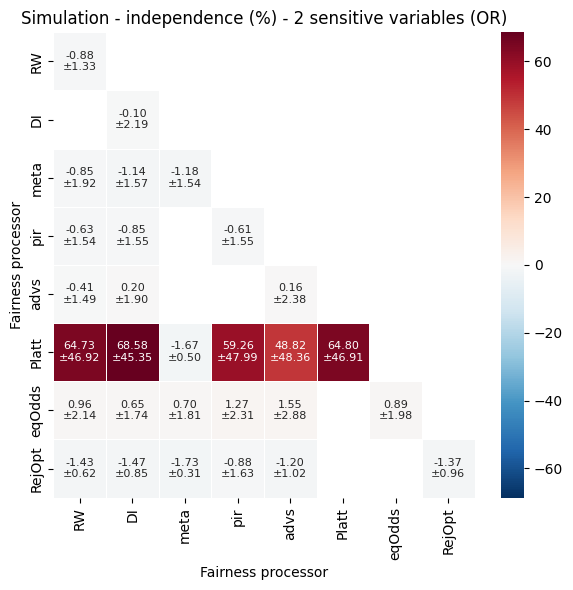

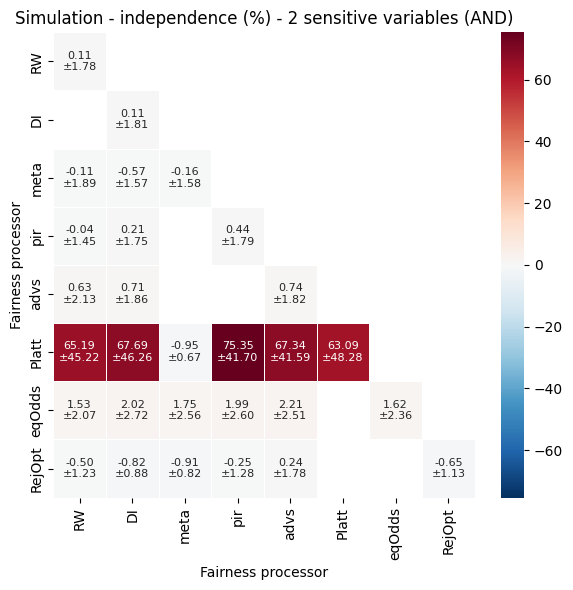

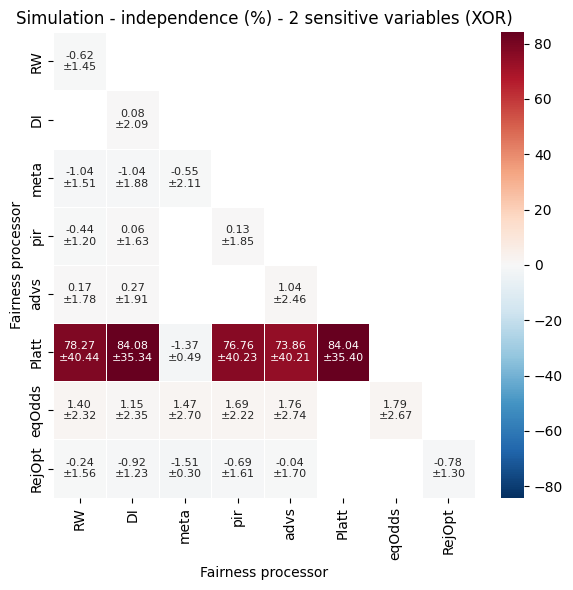

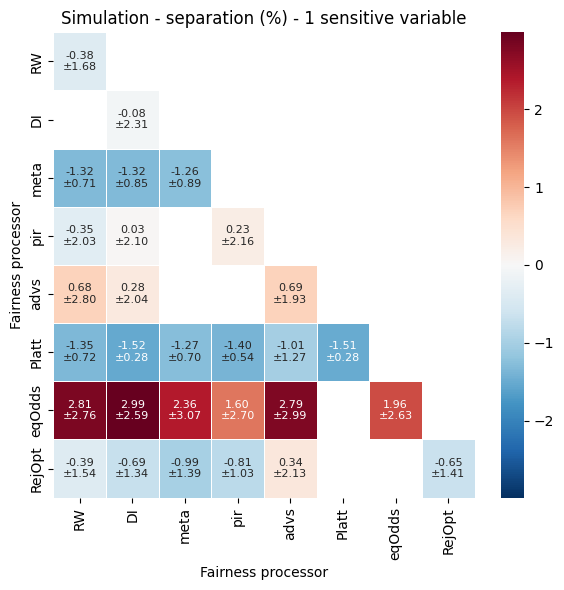

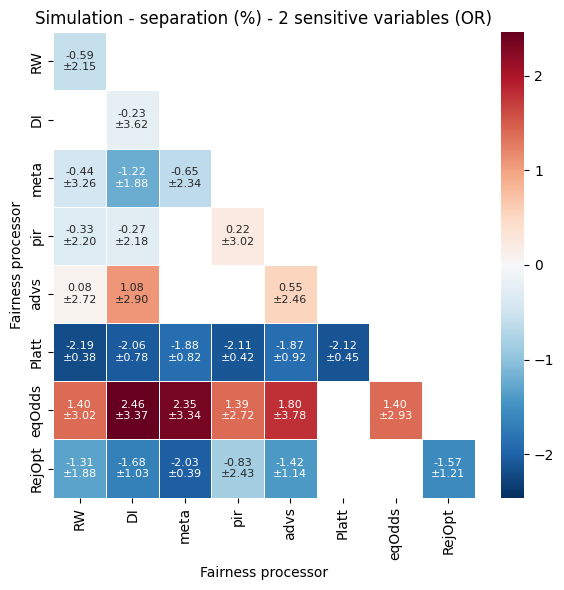

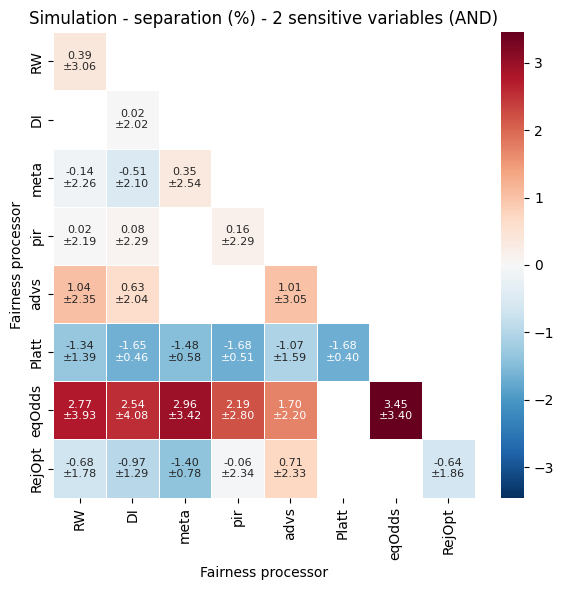

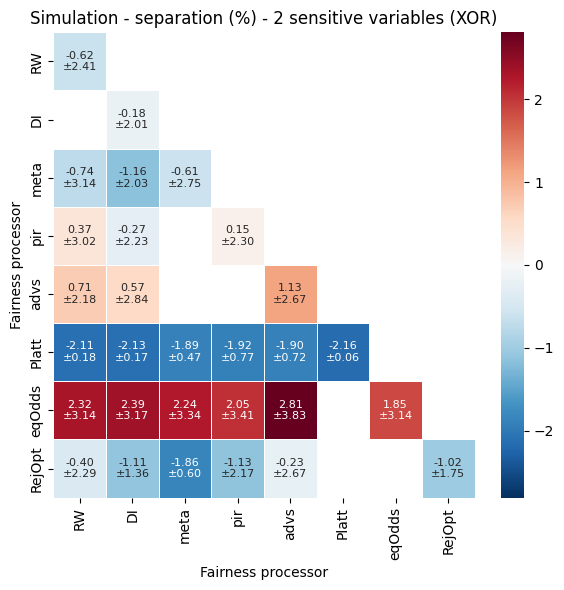

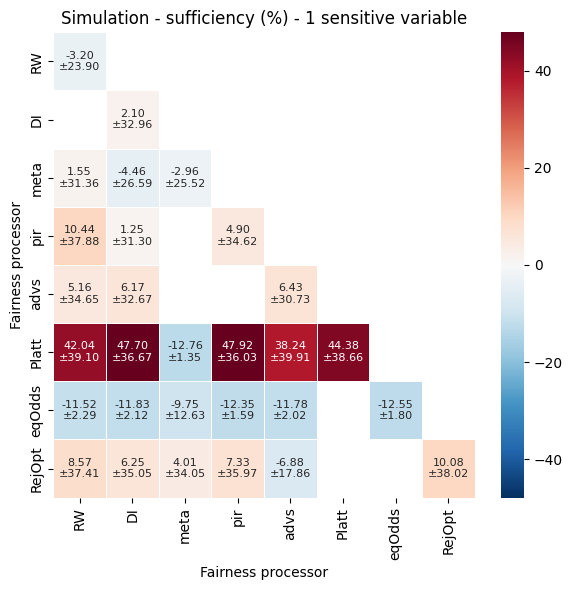

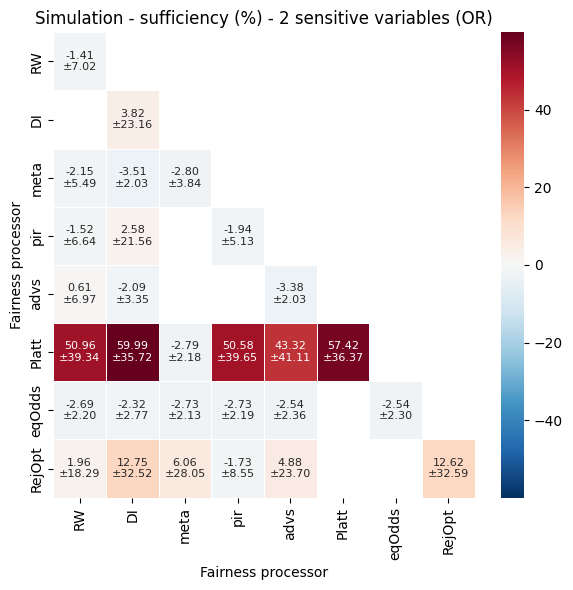

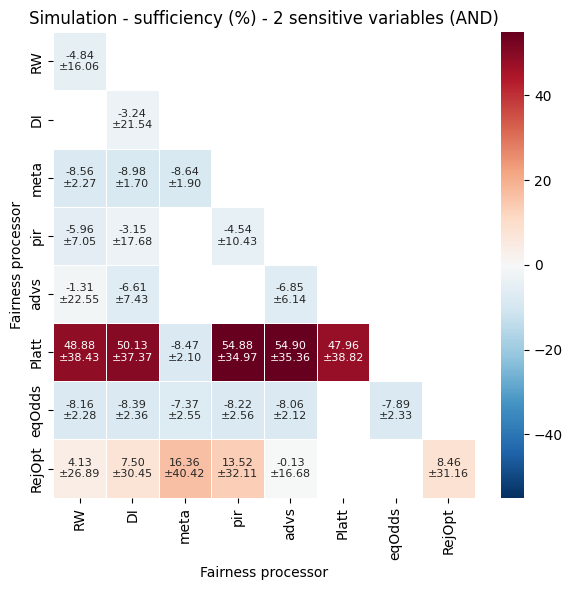

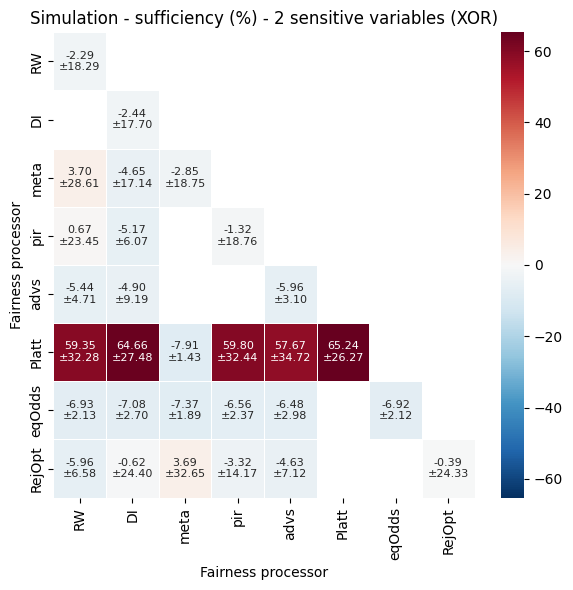

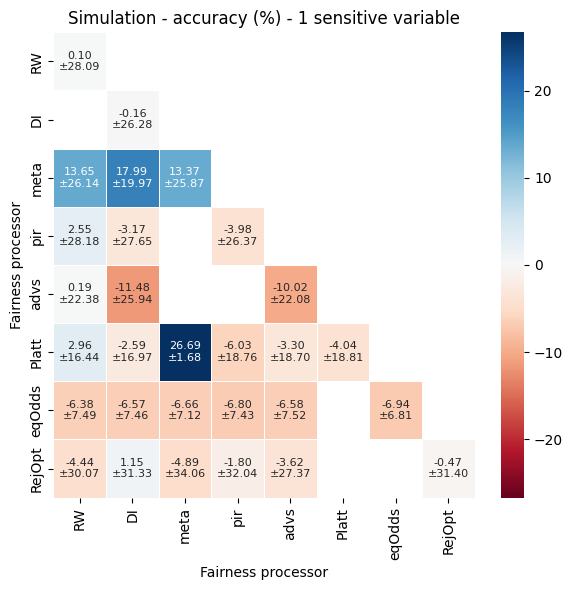

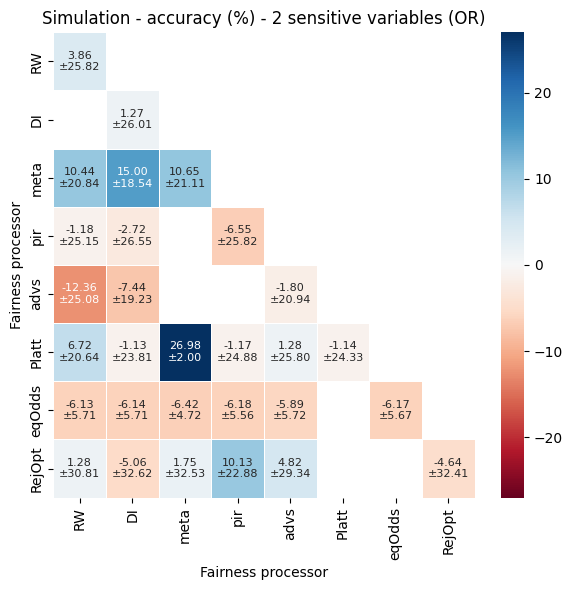

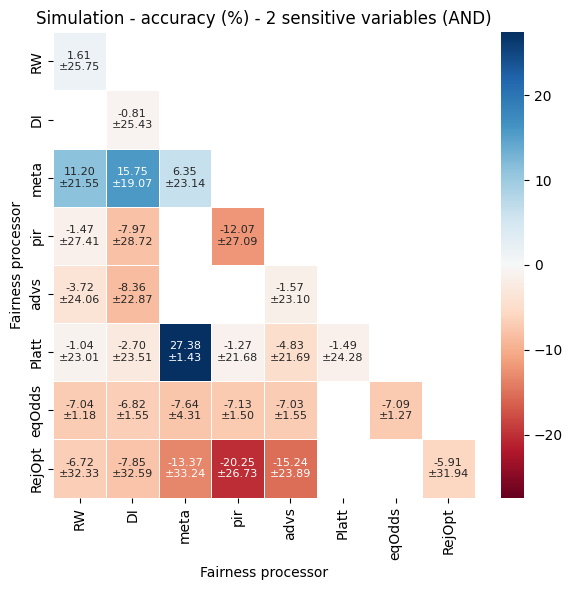

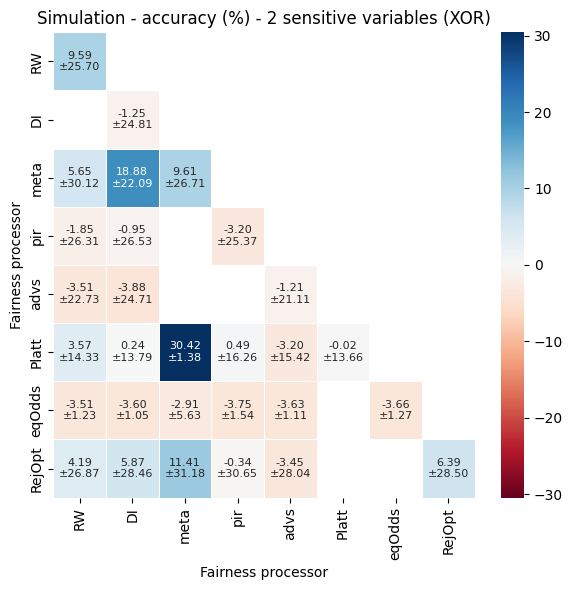

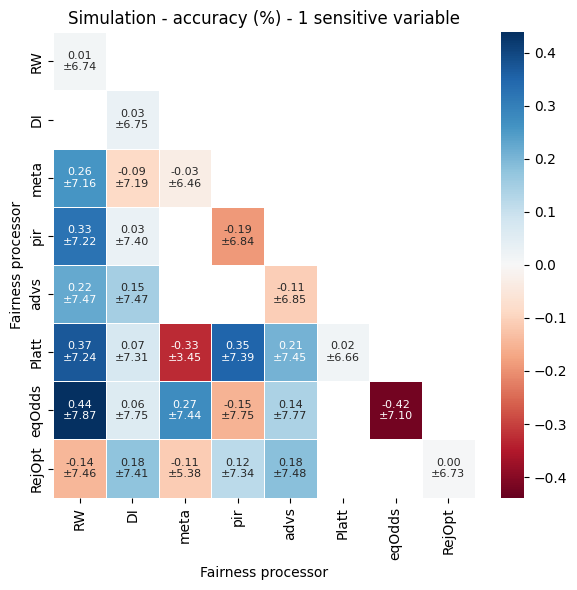

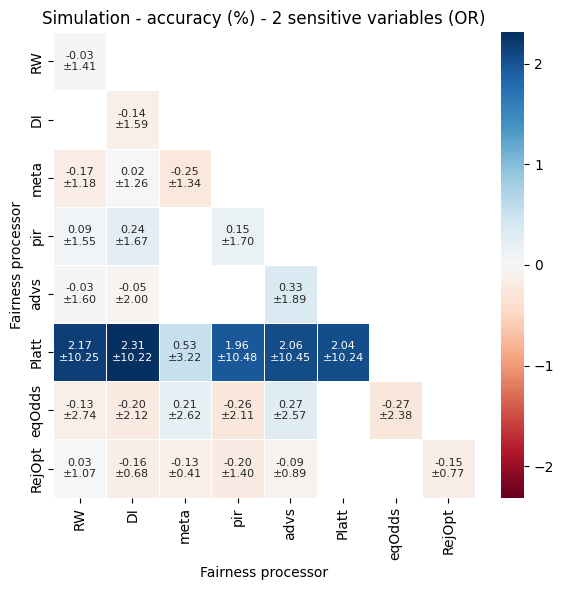

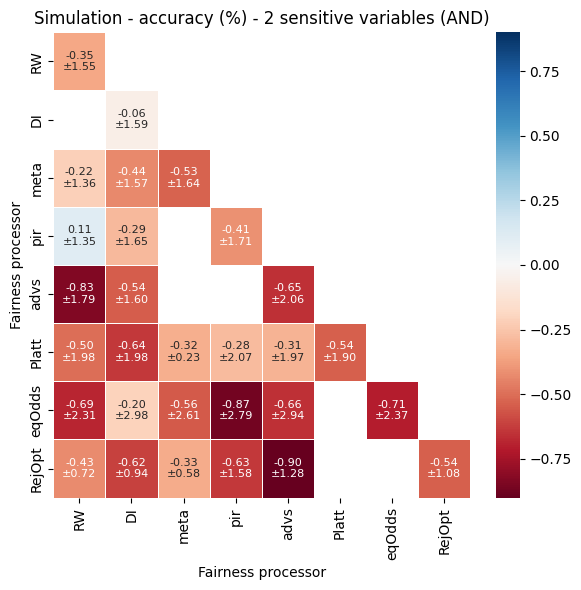

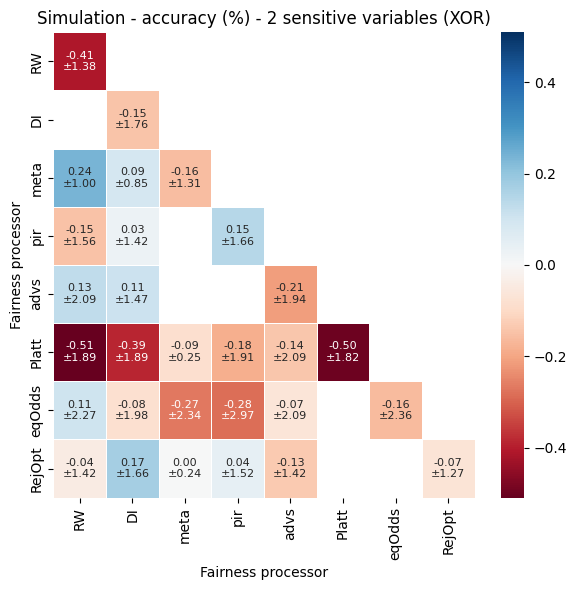

In [92]:
for metric in metrics:
    if metric == 'acc' or metric == 'bal_acc':
        metric_n = 'accuracy'
        invert_color = True
    else:
        metric_n = metric
        invert_color = False
    
    fig, ax = plot_heat_combination_matrix(meanResults['Simulation1V_ind'], meanResults['Simulation1V_com'], stdResults['Simulation1V_ind'], stdResults['Simulation1V_com'], metric, invert_color=invert_color)
    ax.set_title("Simulation - " + metric_n + " (%) - 1 sensitive variable")
    plt.tight_layout()
    plt.show()
    fig.savefig('results/Figures/performance_matrix/' + metric + '/Median1V_' + metric + '.png')

    fig, ax = plot_heat_combination_matrix(meanResults['Simulation2V_OR_ind'], meanResults['Simulation2V_OR_com'], stdResults['Simulation2V_OR_ind'], stdResults['Simulation2V_OR_com'], metric, invert_color=invert_color)
    ax.set_title("Simulation - " + metric_n + " (%) - 2 sensitive variables (OR)")
    plt.tight_layout()
    plt.show()
    fig.savefig('results/Figures/performance_matrix/' + metric + '/Median2V_OR' + metric + '.png')

    fig, ax = plot_heat_combination_matrix(meanResults['Simulation2V_AND_ind'], meanResults['Simulation2V_AND_com'], stdResults['Simulation2V_AND_ind'], stdResults['Simulation2V_AND_com'], metric, invert_color=invert_color)
    ax.set_title("Simulation - " + metric_n + " (%) - 2 sensitive variables (AND)")
    plt.tight_layout()
    plt.show()
    fig.savefig('results/Figures/performance_matrix/' + metric + '/Median2V_AND' + metric + '.png')

    fig, ax = plot_heat_combination_matrix(meanResults['Simulation2V_XOR_ind'], meanResults['Simulation2V_XOR_com'], stdResults['Simulation2V_XOR_ind'], stdResults['Simulation2V_XOR_com'], metric, invert_color=invert_color)
    ax.set_title("Simulation - " + metric_n + " (%) - 2 sensitive variables (XOR)")
    plt.tight_layout()
    plt.show()
    fig.savefig('results/Figures/performance_matrix/' + metric + '/Median2V_XOR' + metric + '.png')

In [ ]:
def graph_visualization(meanInd: pd.DataFrame, meanCom: pd.DataFrame, 
                        stdInd: pd.DataFrame, stdCom: pd.DataFrame, 
                        metric: str, title: str = "", name_end: str = "", 
                        invert_color: bool = True) -> None:
    """
    Graph plot that shows a performance metric for all methods and combinations
    ======================================================================================================
    Inputs:
        meanInd (pd.DataFrame): Data frame that stores the mean results of the individual methods.
        meanCom (pd.DataFrame): Data frame that stores the mean results of the MP processors.
        stdInd (pd.DataFrame): Data frame that stores the std results of the individual methods.
        stdCom (pd.DataFrame): Data frame that stores the std results of the MP processors.
        metric (str): Name of the metric that will we plotted.
        title (str): Title of the plot.
        name_end (str): Name of the file in which the plot will be saved.

    Outputs:
        None
    """

    # Load the results and save the ones relevant to the metric we are interested in
    matrices_mean = combination_matrix(meanInd, meanCom)
    matrices_std = combination_matrix(stdInd, stdCom)
    
    matrix_mean = matrices_mean[metric]
    matrix_std = matrices_std[metric]
    
    baseline_val = meanInd.loc['logreg', metric] if 'logreg' in meanInd.index else 0
    matrix_diff = matrix_mean - baseline_val
    
    # Create graph
    G = nx.Graph()

    # Add nodes and relationships
    proc = preproc + inproc + postproc
    combinations = [(node1, node2) for node1 in preproc for node2 in inproc]
    combinations += [(node1, node2) for node1 in preproc for node2 in postproc]
    combinations += [(node1, node2) for node1 in inproc for node2 in postproc]
    
    for node in proc:
        if node in matrix_diff.index:
            G.add_node(node, weight=matrix_diff.loc[node, node], std=matrix_std.loc[node, node])
            
    for u, v in combinations:
        if u in matrix_diff.index and v in matrix_diff.columns:
            G.add_edge(u, v, weight=matrix_diff.loc[u, v], std=matrix_std.loc[u, v])

            

    # Node colors according to individual performance
    node_colors = [nx.get_node_attributes(G, 'weight')[node] for node in G.nodes()]
    node_labels = {node: f"{node}\n{G.nodes[node]['weight']:.2f}\n(±{G.nodes[node]['std']:.2f})" for node in G.nodes()}
    
    node_color_map = plt.cm.RdBu if invert_color else plt.cm.RdBu_r
    
    node_vals = [G.nodes[n]['weight'] for n in G.nodes()]
    edge_vals = [G[u][v]['weight'] for u, v in G.edges()]
    all_vals = node_vals + edge_vals
    
    if all_vals:
        max_abs = np.max(np.abs(all_vals))
        v_lim = max_abs if max_abs > 0 else 0.05
    else:
        v_lim = 0.05

    # Edge colors according to combined performance
    edge_colors = [G[u][v]['weight'] for u, v in G.edges()]
    edge_color_map = node_color_map

    # Graph layout
    pos = nx.spring_layout(G, k=2., seed=42)

    shell_pre = [n for n in preproc if n in G.nodes()]
    shell_in = [n for n in inproc if n in G.nodes()]
    shell_post = [n for n in postproc if n in G.nodes()]
    
    pos = nx.shell_layout(G, nlist=[shell_pre, shell_in, shell_post])

    # Create fig
    fig, ax = plt.subplots(figsize=(6, 6))  

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=node_color_map, 
                           node_size=2500, vmin=-v_lim, vmax=v_lim)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_color='black', font_weight='bold')

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=edge_color_map, 
                           width=3, edge_vmin=-v_lim, edge_vmax=v_lim)

    # Edge labels
    edge_labels_raw = nx.get_edge_attributes(G, 'weight')
    edge_std_raw = nx.get_edge_attributes(G, 'std')
    edge_labels = {k: f"{v:.2f}\n(±{edge_std_raw[k]:.2f})" for k, v in edge_labels_raw.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

    # Colorbar
    sm_nodes = plt.cm.ScalarMappable(cmap=node_color_map, norm=plt.Normalize(vmin=-v_lim, vmax=v_lim))
    sm_nodes.set_array([])
    cbar_nodes = plt.colorbar(sm_nodes, ax=ax, shrink=0.7, aspect=10, pad=0.02)
    cbar_nodes.set_label(f'Gain in {metric} (%) wrt. baseline', rotation=270, labelpad=20)

    # Show fig and save it
    plt.title(title)
    plt.tight_layout()
    plt.show()
    fig.savefig('results/Figures/performance_graph/' + name_end + '.png')

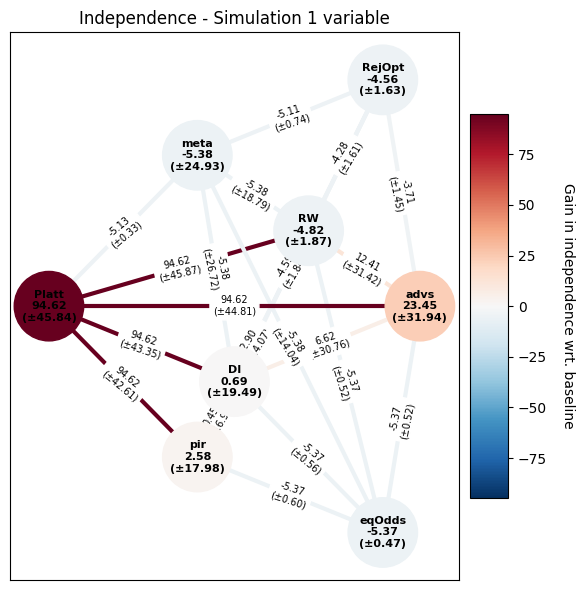

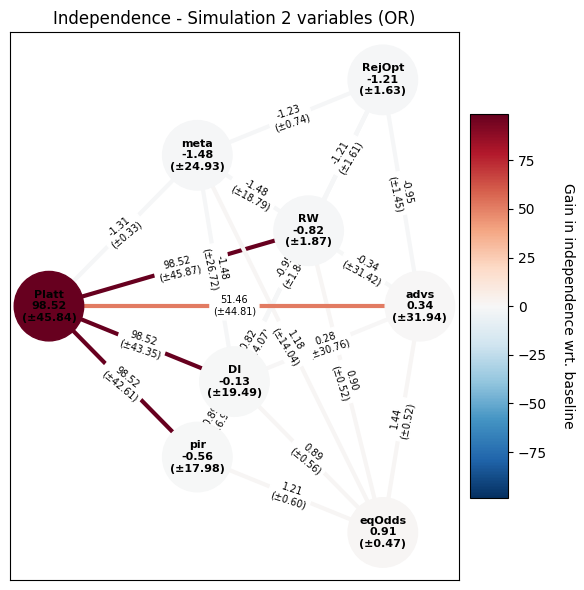

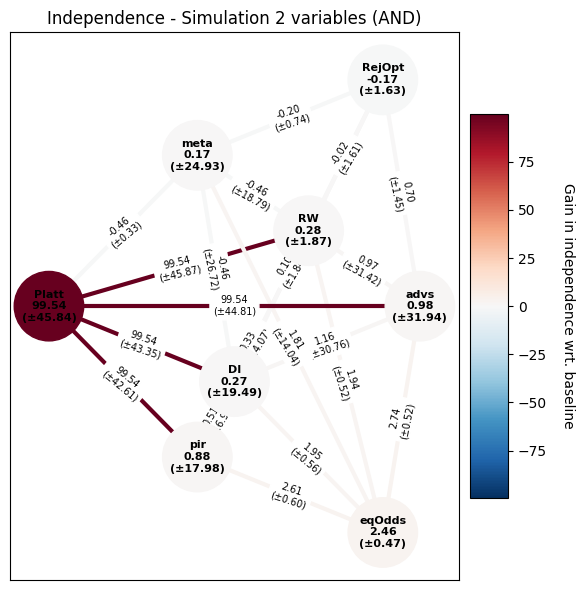

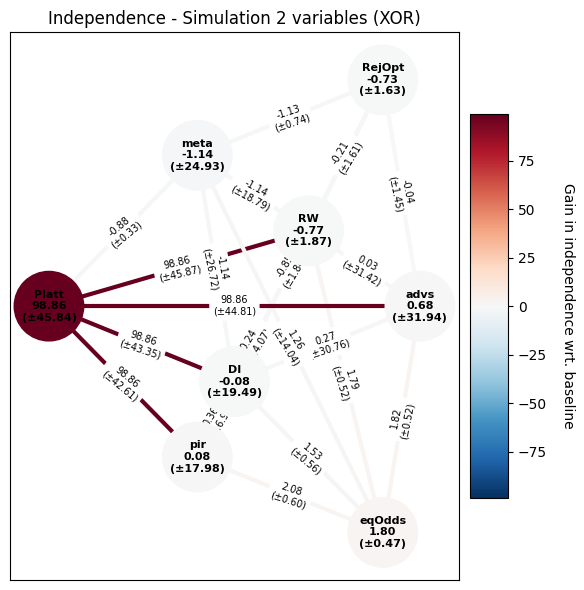

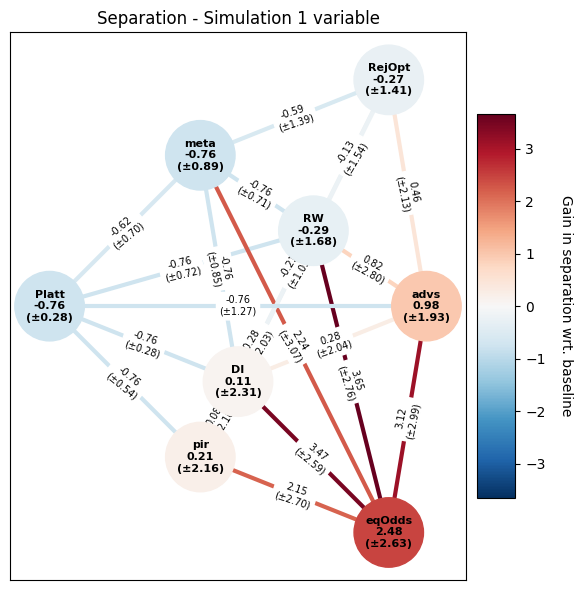

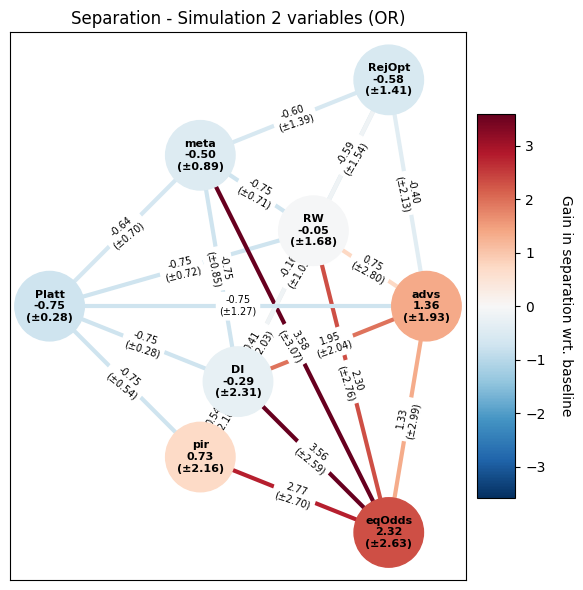

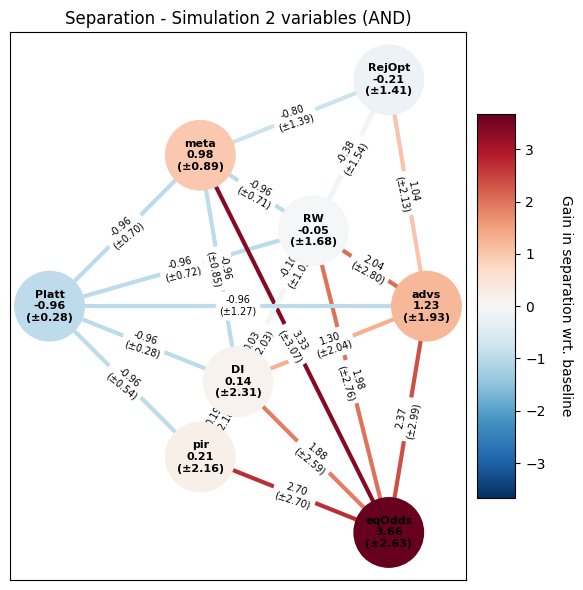

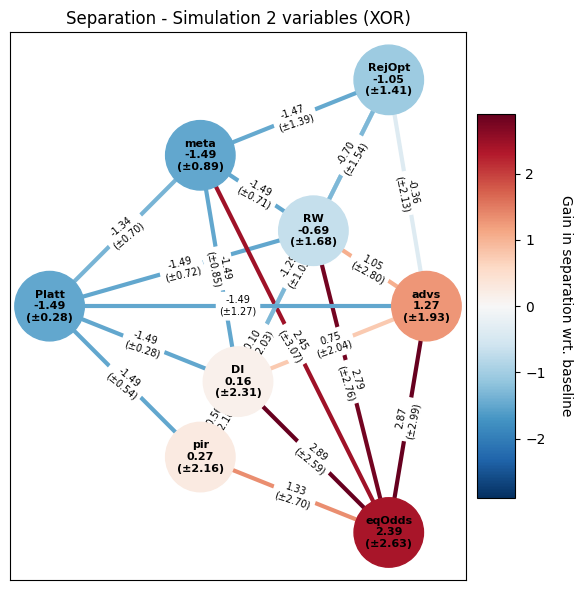

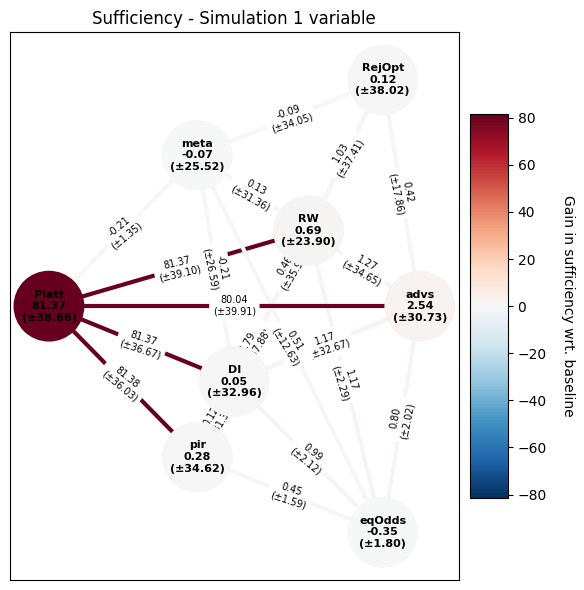

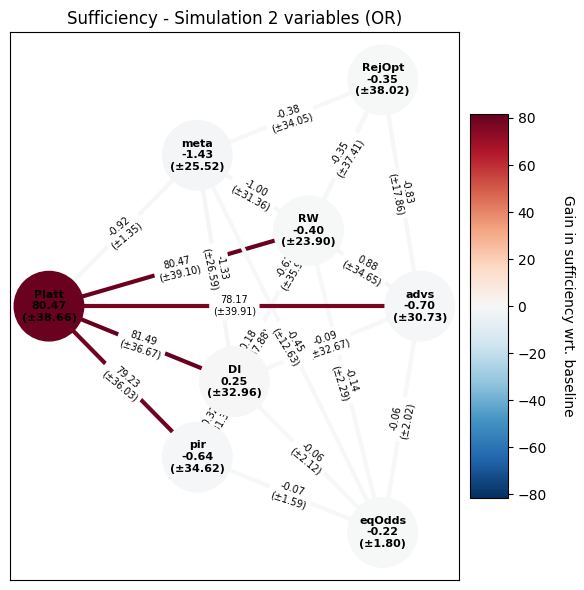

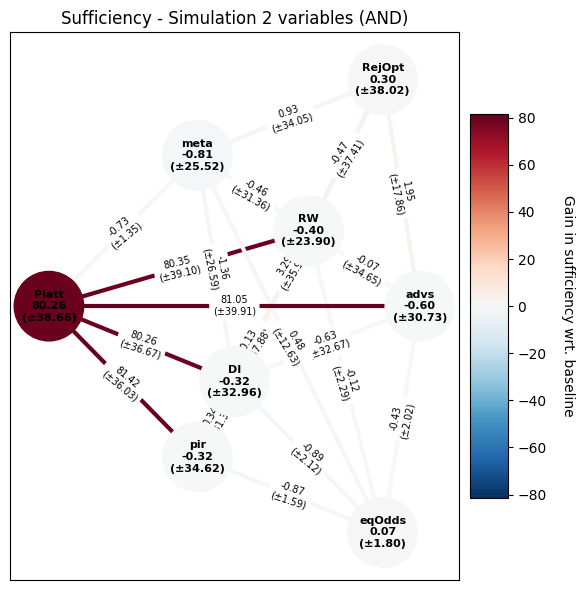

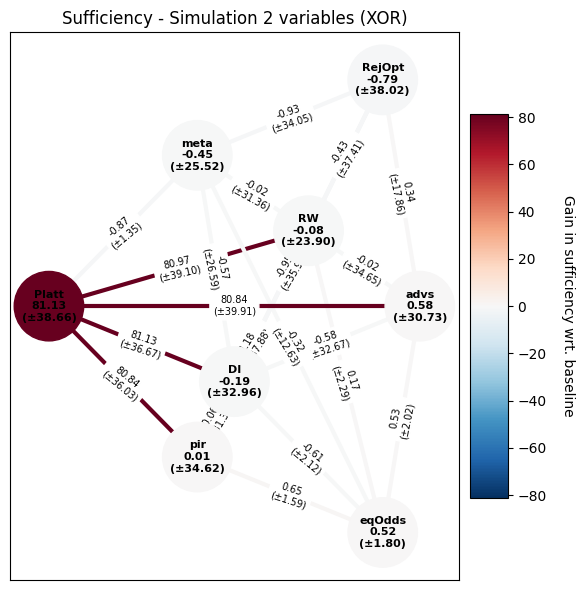

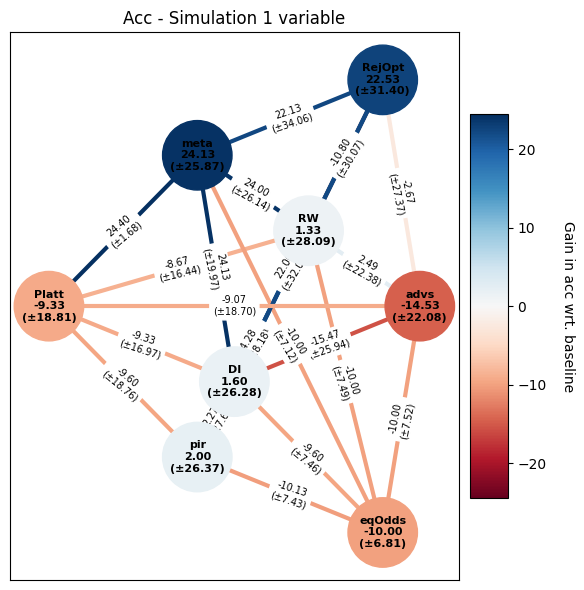

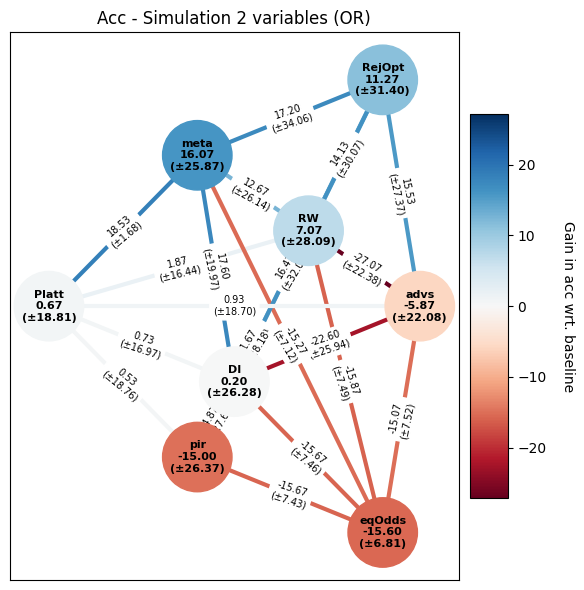

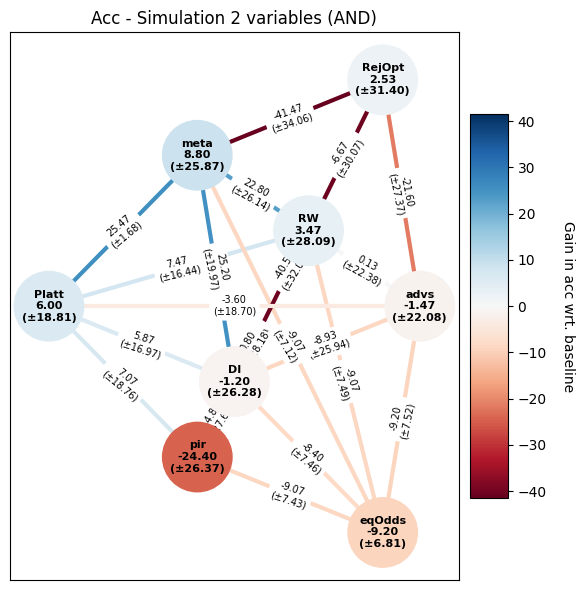

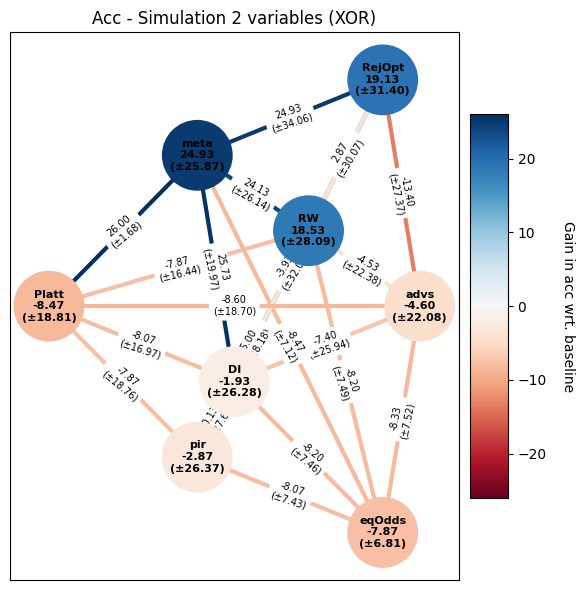

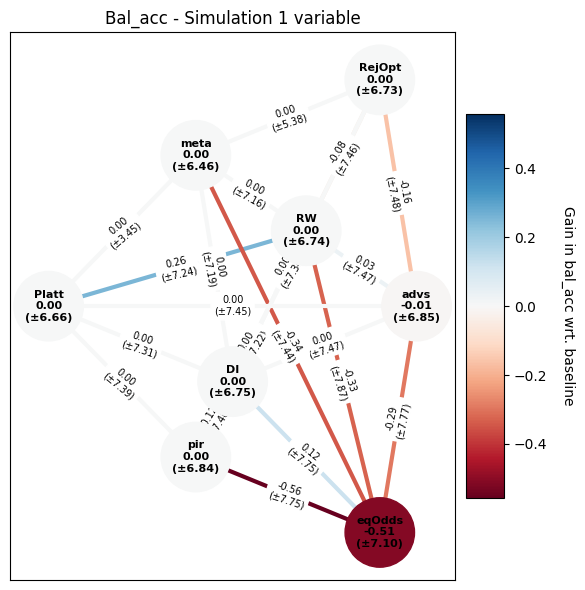

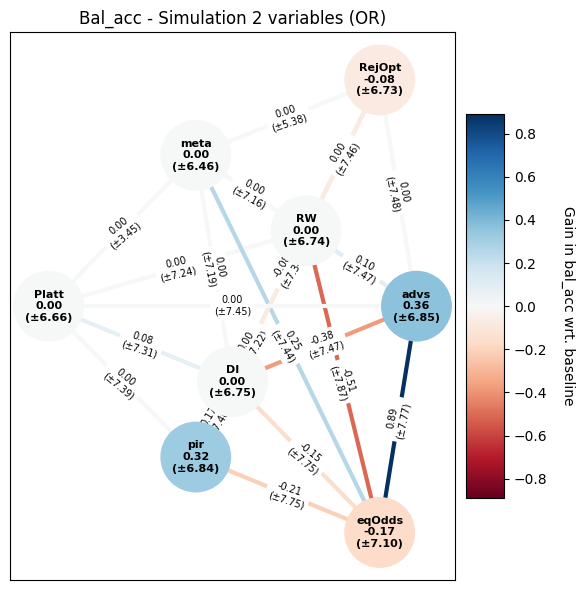

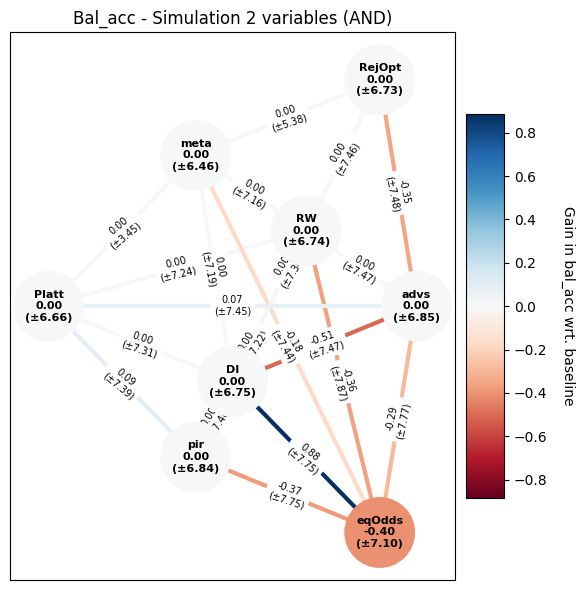

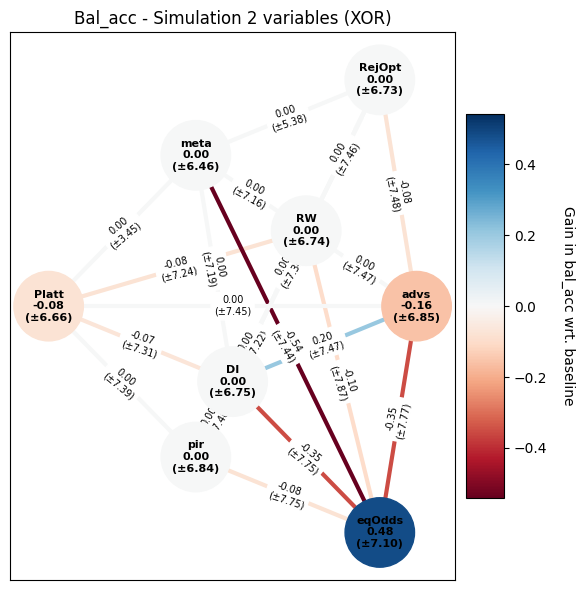

In [95]:
preproc = ['RW', 'DI']
inproc = ['meta', 'pir', 'advs']
postproc = ['Platt', 'eqOdds', 'RejOpt']

proc = preproc + inproc + postproc

for metric in metrics:
    if metric == 'acc' or metric == 'bal_acc':
        metric_n = 'accuracy'
        invert_color = True
    else:
        metric_n = metric
        invert_color = False
    graph_visualization(
        medianResults['Simulation1V_ind'],
        medianResults['Simulation1V_com'],
        stdResults['Simulation1V_ind'],
        stdResults['Simulation1V_com'],
        metric,
        title = f"{metric.capitalize()} - Simulation 1 variable",
        name_end =  metric + "/Median1V",
        invert_color=invert_color
    )

    graph_visualization(
        medianResults['Simulation2V_OR_ind'],
        medianResults['Simulation2V_OR_com'],
        stdResults['Simulation1V_ind'],
        stdResults['Simulation1V_com'],
        metric,
        title = f"{metric.capitalize()} - Simulation 2 variables (OR)",
        name_end = metric + "/Median2V_OR",
        invert_color=invert_color
    )

    graph_visualization(
        medianResults['Simulation2V_AND_ind'],
        medianResults['Simulation2V_AND_com'],
        stdResults['Simulation1V_ind'],
        stdResults['Simulation1V_com'],
        metric,
        title = f"{metric.capitalize()} - Simulation 2 variables (AND)",
        name_end =  metric + "/Median2V_AND",
        invert_color=invert_color
    )

    graph_visualization(
        medianResults['Simulation2V_XOR_ind'],
        medianResults['Simulation2V_XOR_com'],
        stdResults['Simulation1V_ind'],
        stdResults['Simulation1V_com'],
        metric,
        title = f"{metric.capitalize()} - Simulation 2 variables (XOR)",
        name_end =  metric + "/Median2V_XOR",
        invert_color=invert_color
    )